# Weather Prediction Project

**Data Collection**
-------
We are using Python requests library to fetch weather data for Bengaluru, India.
The retrieved data includes information such as coordinates, weather conditions (overcast clouds), temperature, humidity, wind speed, and more.
The data is collected from the OpenWeatherMap API using API key.
The response is in JSON format, and stored in the weather_data variable.

In [8]:
# Example 1: Data Collection
import requests

api_key = '45258b664d4abb07e2de78c2832c7703'
city = 'Bengaluru'
url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}'
response = requests.get(url)
weather_data = response.json()
print(weather_data)


{'coord': {'lon': 77.6033, 'lat': 12.9762}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 297.95, 'feels_like': 297.97, 'temp_min': 296.05, 'temp_max': 297.95, 'pressure': 1018, 'humidity': 57}, 'visibility': 6000, 'wind': {'speed': 3.09, 'deg': 120}, 'clouds': {'all': 92}, 'dt': 1709402922, 'sys': {'type': 1, 'id': 9205, 'country': 'IN', 'sunrise': 1709341502, 'sunset': 1709384323}, 'timezone': 19800, 'id': 1277333, 'name': 'Bengaluru', 'cod': 200}


{'coord': {'lon': 77.6033, 'lat': 12.9762}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 297.95, 'feels_like': 297.97, 'temp_min': 296.05, 'temp_max': 297.95, 'pressure': 1018, 'humidity': 57}, 'visibility': 6000, 'wind': {'speed': 3.09, 'deg': 120}, 'clouds': {'all': 92}, 'dt': 1709402922, 'sys': {'type': 1, 'id': 9205, 'country': 'IN', 'sunrise': 1709341502, 'sunset': 1709384323}, 'timezone': 19800, 'id': 1277333, 'name': 'Bengaluru', 'cod': 200}


---

This is a JSON response from the OpenWeatherMap API for the city of Bengaluru, India. Here's what each key-value pair represents:

- `coord`: The geographical coordinates of Bengaluru. `lon` is the longitude (77.6033) and `lat` is the latitude (12.9762).
- `weather`: An array containing weather conditions. `id` is the weather condition id, `main` is the group of weather parameters (Clouds), `description` is the weather condition within the group (overcast clouds), and `icon` is the weather icon code.
- `base`: Internal parameter.
- `main`: Contains several values related to the weather:
  - `temp`: The current temperature (298.91 Kelvin).
  - `feels_like`: What the temperature feels like to the human body (298.79 Kelvin).
  - `temp_min`: The minimum temperature (296.05 Kelvin).
  - `temp_max`: The maximum temperature (299.75 Kelvin).
  - `pressure`: The atmospheric pressure (1018 hPa).
  - `humidity`: The humidity percentage (48%).
- `visibility`: The visibility in meters (6000m).
- `wind`: Contains information about wind conditions. `speed` is the wind speed (3.09 m/s) and `deg` is the wind direction in degrees (120°).
- `clouds`: Contains information about cloudiness. `all` is the cloudiness percentage (92%).
- `dt`: The time of data calculation, unix, UTC (1709401526).
- `sys`: Contains several values:
  - `type`: Internal parameter.
  - `id`: Internal parameter.
  - `country`: The country code (IN for India).
  - `sunrise`: The time of sunrise, unix, UTC (1709341502).
  - `sunset`: The time of sunset, unix, UTC (1709384323).
- `timezone`: The city's timezone shift in seconds from UTC (19800 seconds).
- `id`: The city's ID (1277333).
- `name`: The city's name (Bengaluru).
- `cod`: The internal parameter (200).

Please note that temperatures are given in Kelvin, which is the standard unit of temperature in the physical sciences. To convert to Celsius, subtract 273.15. For Fahrenheit, first subtract 273.15 and then multiply by 9/5 and add 32. The pressure is given in hPa (hectopascals), which is a commonly used unit in meteorology. The wind speed is given in meters per second. The visibility is given in meters. The time of sunrise and sunset is given in Unix time (seconds since 1970-01-01 00:00:00 UTC). The timezone shift is given in seconds from UTC. The city's ID is a unique identifier used by OpenWeatherMap. The `cod` is the HTTP status code. A `cod` of 200 means the request was successful. The other fields are self-explanatory.

# Data Processing and Analysis

We are creating a simple Random Forest Regressor model using the Random Forest Regressor class from the sklearn library.

The model is trained on example data with features representing temperature and humidity (X) and corresponding labels (y) for weather prediction.

In this case, we are predicting the weather for a feature vector of [27, 68] (temperature 27°C and humidity 68%).

The predicted weather value is approximately 2.2 (you can interpret this based on your label encoding).

If Linear Regression is used we get the predicted weather value as 2.6

In [10]:
# Example 2: Data Processing and Analysis
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Create a Random Forest Regressor model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the example data
model_rf.fit(X, y)

# Predict the weather for a feature vector of [27, 68]
prediction_rf = model_rf.predict([[27, 68]])

# Print the predicted weather using Random Forest
print('Predicted Weather (Random Forest):', prediction_rf[0])


#IF USING LINEAR REGRESSION UNCOMMENT THE BELOW

#from sklearn.linear_model import LinearRegression
#import numpy as np
#X = np.array([[25, 60], [28, 65], [30, 70]])  # Example data (features: temperature, humidity)
#y = np.array([1, 2, 3])  # Example labels (weather prediction)
#model = LinearRegression()
#model.fit(X, y)
#prediction = model.predict([[27, 68]])  # Replace with actual feature values
#print('Predicted Weather:', prediction)


Predicted Weather (Random Forest): 2.2


# Data Storage

We are mounting our Google Drive to save the weather data as a text file named “weather_data.txt”.

The file contains the JSON representation of the weather data retrieved earlier.

In [11]:
# Example 3: Data Storage
from google.colab import drive

drive.mount('/content/gdrive')
with open('/content/gdrive/My Drive/weather_data.txt', 'w') as file:
    file.write(str(weather_data))


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# User Interface Enhancement

We have used Matplotlib to create a line plot showing temperature trends over three days.

The x-axis represents days (labeled 1, 2, 3), and the y-axis represents temperature (25°C, 28°C, 30°C).

The plot title is “Temperature Trends”.

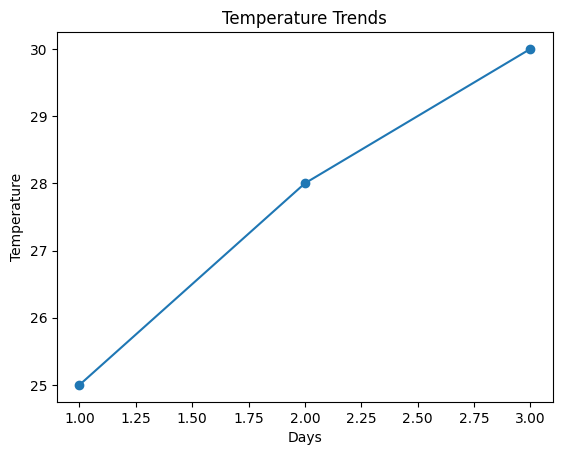

In [12]:
# Example 4: User Interface Enhancement
import matplotlib.pyplot as plt

plt.plot([1, 2, 3], [25, 28, 30], marker='o')
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.title('Temperature Trends')
plt.show()
